<a href="https://colab.research.google.com/github/fay421/ML_LinearRegression/blob/main/Eccomerce-Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regession Project- Ecommerce Customers

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

Avg. Session Length: Average session of in-store style advice sessions.
Time on App: Average time spent on App in minutes
Time on Website: Average time spent on Website in minutes
Length of Membership: How many years the customer has been a member.

### Read in the Ecommerce Customers csv file as a DataFrame called df

In [2]:
df = pd.read_csv('Ecommerce Customers.csv')

## EDA

In [3]:
df.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [4]:
df.shape

(500, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
df=df.drop(['Email','Address','Avatar'], axis = 1) # remove categorical columns

## Visualization
### Join Plot
##### Create a jointplot to compare the *Time on Website* and *Yearly Amount Spent* columns.

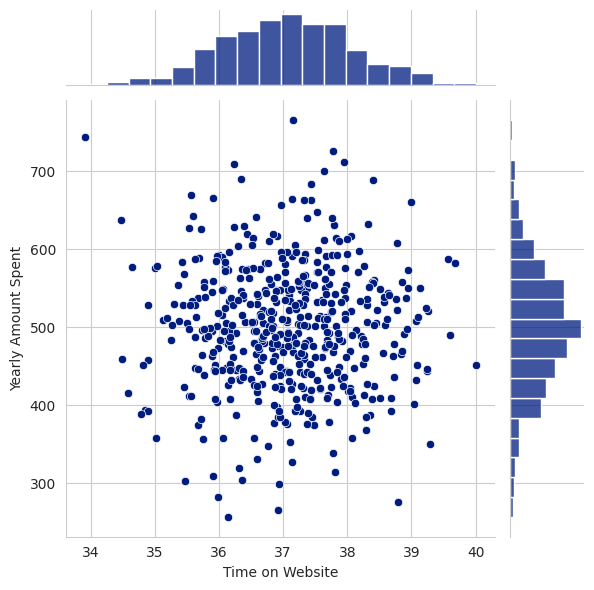

In [21]:
# setup:
sns.set_palette("dark")
sns.set_style('whitegrid')

# joinplot
sns.jointplot(data=df,x='Time on Website', y='Yearly Amount Spent');


Create a jointplot to compare the Time on App and Yearly Amount Spent columns.

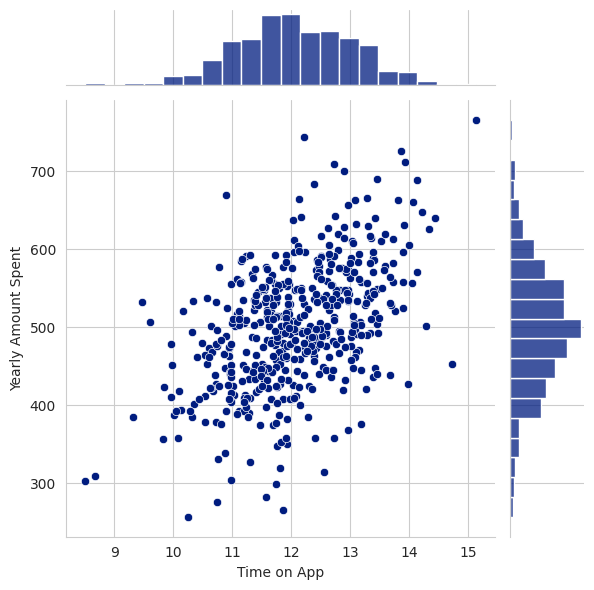

In [16]:
sns.jointplot(data=df,x='Time on App', y='Yearly Amount Spent');

### More time on app more money spent!

Create a jointplot to compare Length of Membership and Yearly Amount Spent columns.

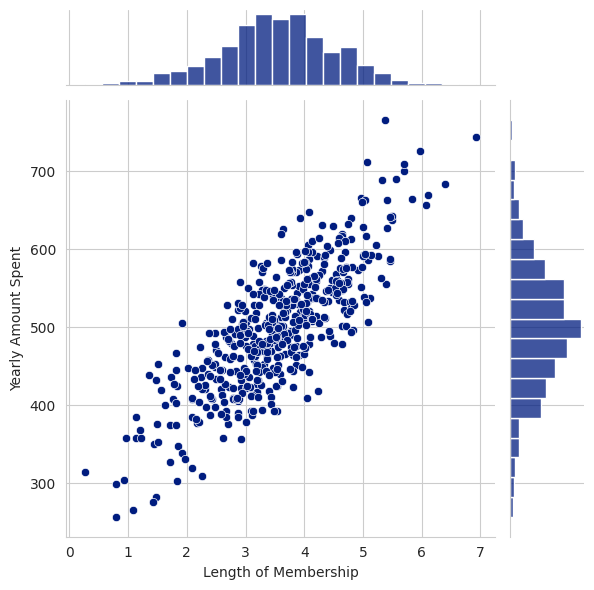

In [17]:
sns.jointplot(data=df,x='Length of Membership', y='Yearly Amount Spent');

## Longer membership more money spent!

Create a jointplot to compare Length of Membership and Time on App columns

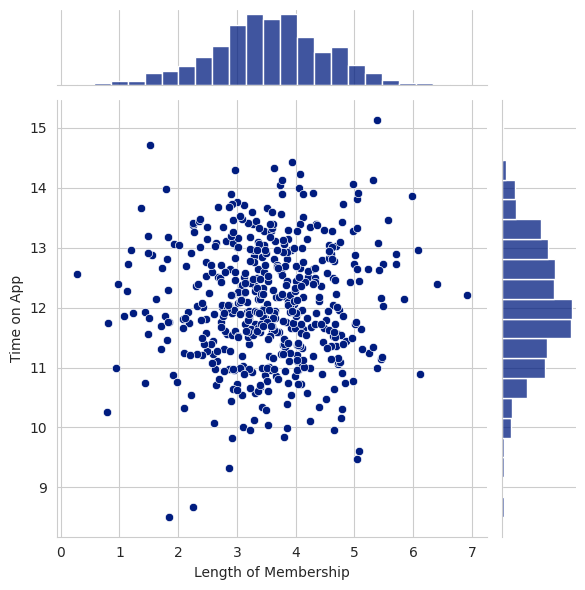

In [18]:
sns.jointplot(data=df,x='Length of Membership', y='Time on App');

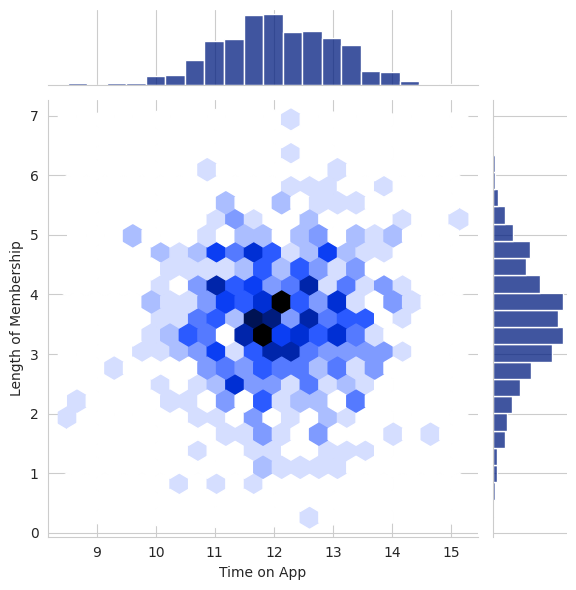

In [19]:
sns.jointplot(data=df ,x='Time on App',y='Length of Membership',kind='hex');

Let's explore these types of relationships across the entire data set.

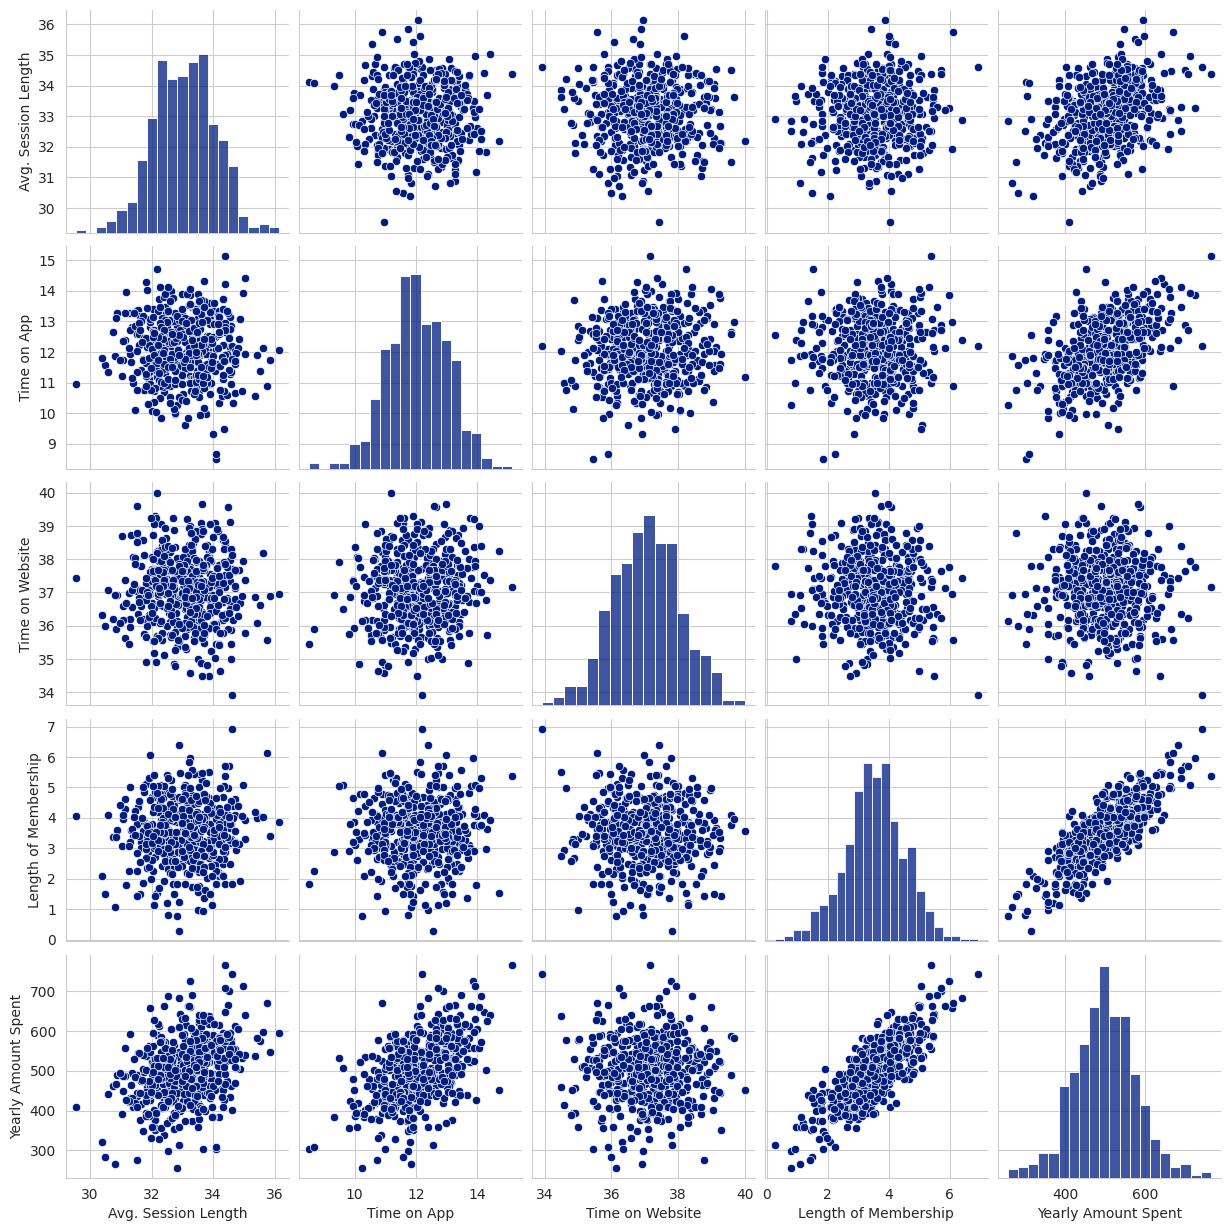

In [22]:
sns.pairplot(df);

Based on the above plot, there seems to be the most correlation between the length of Membership and Yearly Amount Spent.

### Create a linear model plot of Yearly Amount Spent vs. Length of Membership

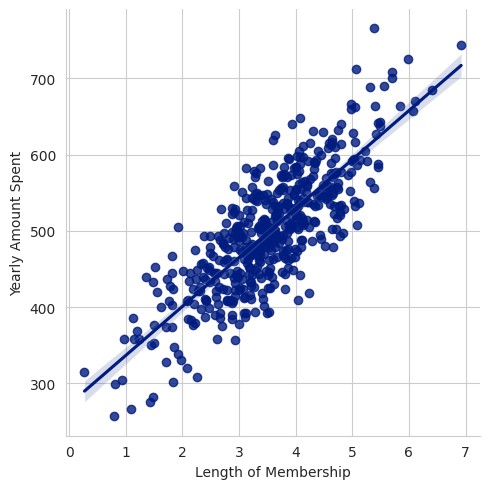

In [25]:
sns.lmplot(data=df, x='Length of Membership', y = 'Yearly Amount Spent');

##Training and Testing Data

In [27]:
X = df.iloc[:,:-1] #set a variable X equal to the numerical features
y = df.iloc[: ,-1] #set variable y equal to the "Yearly Amount Spent" column

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test ,y_train , y_test =train_test_split( X,y, test_size=0.3 , random_state= 42)

## Training the Model
### Now it's time to train our model on the training data!

In [30]:
from sklearn.linear_model import LinearRegression

Create an instance of a LinearRegression() model named LR

In [31]:
LR=LinearRegression()

Fit lm on the training data

In [32]:
LR.fit(X_train,y_train)

LinearRegression()

Print out the coefficients and intercept of the model

In [33]:
print('Coefficients: \n ' , LR.coef_)
print('Intercept: \n' , LR.intercept_)

Coefficient: 
  [25.72425621 38.59713548  0.45914788 61.67473243]
Intercept: 
 -1050.6536746645725


## Predicting Test Data

In [34]:
y_pred = LR.predict(X_test)


Create a scatterplot of the real test values versus the predicted values

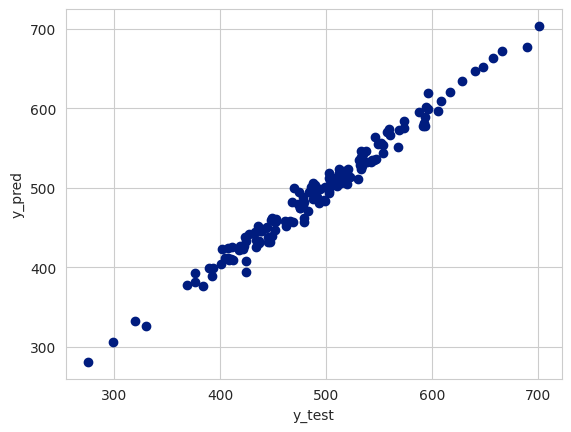

In [36]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred');

## Evaluating the Model
Let's evaluate our model performance by calculating the Mean Absolute Error, Mean Squared Error, the Root Mean Squared Error and R2 Score.

In [37]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 8.426091641432116
MSE: 103.91554136503333
RMSE: 10.193897260863155


In [39]:
R2=r2_score(y_test, y_pred)
print('R2_Score: \n',R2)

R2_Score: 
 0.9808757641125855


## Residuals
Let's quickly explore the residuals to make sure everything was okay with our data.

### distribution Plot
Inspecting the distribution of residuals helps to assess the accuracy and reliability of the linear regression model.

<ipython-input-41-601f72a95855>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred),bins=50);


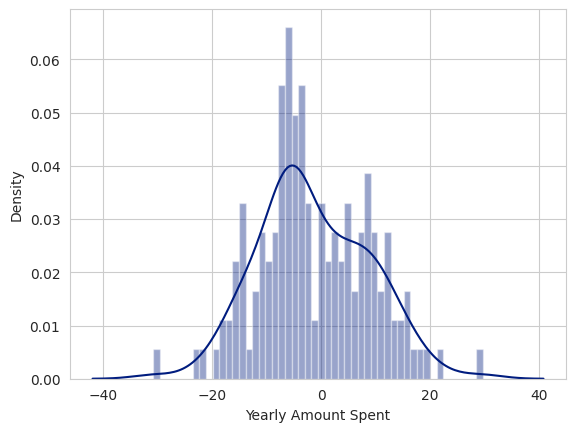

In [41]:
sns.distplot((y_test-y_pred),bins=50);

A normal distribution of residuals suggests that the errors are approximately normally distributed and indicates the model is capturing the patterns in the data.

## Conclusion

We still want to figure out which one of the features ('Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership') has an important impact on the 'Yearly Amount Spent'.

Let's see if we can interpret the coefficients at all to get an idea.

## Recreate the dataframe below.

In [42]:
coeffecients = pd.DataFrame(LR.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


Interpreting the coefficients:


*   Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.72 total dollars spent.

*   Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.

*   Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.46 total dollars spent.
*   Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.67 total dollars spent.









## As a result:



*   The coefficients provide insights into the strength and direction of the relationship between each independent variable and the dependent variable.

*   The largest coefficient is associated with "Length of Membership," suggesting that it has the most significant impact on the predicted outcome.
*   "Time on App" also has a substantial positive impact on the predicted outcome.


*   "Avg. Session Length" has a positive impact, though it's smaller compared to "Time on App" and "Length of Membership."


*   "Time on Website" has a smaller impact compared to the other variables.







